In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the bounding boxes
bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    [499.51, 618.71, 734.06, 782.65],
    [15.217, 596.98, 255.37, 746.1],
    [1145.3, 121.67, 1342.1, 262.05],
    [745.83, 598.71, 976.46, 807.44],
    [1500.5, 613.43, 1760.8, 791.44],
    [1159.6, 676.4, 1384.3, 822.95],
    [1669.9, 177.3, 1888.9, 391.73],
    [1288.7, 557, 1519, 750.16],
    [61.481, 0, 327.97, 90.72]
]

tracks = [
    #[1579, 964.74, 1814.8, 1201.8],
    #[1417.6, 1037.4, 1528.7, 1111.2],
    #[890.23, 905.22, 1118.1, 1116.7],
    #[383.47, 941.87, 421.88, 1426.5],
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [197.02, 434.92, 520.74, 690.84],
    [774.69, 430.39, 1020.1, 660.59],
    [549.6, 439.31, 778.23, 640.52],
    [53.311, 400.54, 303.12, 572.61],
    [1322.6, 396.49, 1582.7, 639.04],
    #[35.476, 340.42, 92.972, 520.33],
    [1747, 27.165, 1954.3, 248.34],
    [1188.2, -7.5234, 1409, 134.49],
    #[364.5, 796.21, 459.36, 914.82],
    #[0.062759, 546.21, 60.611, 681.81],
    #[801.07, 0, 1122.3, 108.66],
    #[258.38, 893.62, 444.92, 1070.9],
    #[1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    #[499.51, 618.71, 734.06, 782.65],
    #[15.217, 596.98, 255.37, 746.1],
    #[1145.3, 121.67, 1342.1, 262.05],
    #[745.83, 598.71, 976.46, 807.44],
    #[1500.5, 613.43, 1760.8, 791.44],
    #[1159.6, 676.4, 1384.3, 822.95],
    #[1669.9, 177.3, 1888.9, 391.73],
    #[1288.7, 557, 1519, 750.16],
    #[61.481, 0, 327.97, 90.72]
]

In [3]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# Step 1: Build Graphs
def build_graph(bboxes):
    """
    Build a graph for a set of bounding boxes.
    Each node is the center of a bounding box,
    and edges are defined by pairwise distances between nodes.
    """
    # Compute center points
    centers = np.array([[x + w / 2, y + h / 2] for x, y, w, h in bboxes])
    # Pairwise distances (edge weights)
    distances = cdist(centers, centers)
    return centers, distances

# Step 2: Define a Graph Matching Cost Function
def compute_cost_matrix(centers1, centers2, distances1, distances2):
    """
    Compute the cost matrix for graph matching.
    Combines node similarities (center distances) and edge weight similarities.
    """
    num_nodes1, num_nodes2 = len(centers1), len(centers2)
    cost_matrix = np.zeros((num_nodes1, num_nodes2))

    for i in range(num_nodes1):
        for j in range(num_nodes2):
            # Node-level cost: Distance between centers
            node_cost = np.linalg.norm(centers1[i] - centers2[j])
            
            # Truncate distances to the smaller graph size for edge-level cost
            min_size = min(len(distances1[i]), len(distances2[j]))
            edge_cost = np.linalg.norm(distances1[i][:min_size] - distances2[j][:min_size])
            
            # Total cost: Weighted combination of node and edge costs
            cost_matrix[i, j] = node_cost + edge_cost

    return cost_matrix


# Step 3: Solve the Graph Matching Problem
def match_graphs(centers1, centers2, distances1, distances2):
    """
    Match two graphs using the Hungarian algorithm.
    """
    # Compute the cost matrix
    cost_matrix = compute_cost_matrix(centers1, centers2, distances1, distances2)
    # Solve the assignment problem
    row_indices, col_indices = linear_sum_assignment(cost_matrix)
    return row_indices, col_indices

# Step 4: Match Bounding Boxes
# Example bounding boxes: (x, y, width, height)
# Define the bounding boxes
bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    [499.51, 618.71, 734.06, 782.65],
    [15.217, 596.98, 255.37, 746.1],
    [1145.3, 121.67, 1342.1, 262.05],
    [745.83, 598.71, 976.46, 807.44],
    [1500.5, 613.43, 1760.8, 791.44],
    [1159.6, 676.4, 1384.3, 822.95],
    [1669.9, 177.3, 1888.9, 391.73],
    [1288.7, 557, 1519, 750.16],
    [61.481, 0, 327.97, 90.72]
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [197.02, 434.92, 520.74, 690.84],
    [774.69, 430.39, 1020.1, 660.59],
    [549.6, 439.31, 778.23, 640.52],
    [53.311, 400.54, 303.12, 572.61],
    [1322.6, 396.49, 1582.7, 639.04],
    [1747, 27.165, 1954.3, 248.34],
    [1188.2, -7.5234, 1409, 134.49],
    [163.61, 624.68, 481.58, 842.4],
]

# Build graphs for blue and red bounding boxes
blue_centers, blue_distances = build_graph(bounding_boxes)
red_centers, red_distances = build_graph(tracks)

# Match graphs
row_indices, col_indices = match_graphs(blue_centers, red_centers, blue_distances, red_distances)

# Output matched bounding boxes
matches = [(bounding_boxes[i], tracks[j]) for i, j in zip(row_indices, col_indices)]
print("Matched Bounding Boxes:", matches)


Matched Bounding Boxes: [([1421.1, 7.7202, 1685.3, 220.28], [1188.2, -7.5234, 1409, 134.49]), ([163.61, 624.68, 481.58, 842.4], [163.61, 624.68, 481.58, 842.4]), ([499.51, 618.71, 734.06, 782.65], [197.02, 434.92, 520.74, 690.84]), ([1145.3, 121.67, 1342.1, 262.05], [774.69, 430.39, 1020.1, 660.59]), ([745.83, 598.71, 976.46, 807.44], [549.6, 439.31, 778.23, 640.52]), ([1500.5, 613.43, 1760.8, 791.44], [1560.3, 464.85, 1785.1, 684.02]), ([1159.6, 676.4, 1384.3, 822.95], [1198.3, 531.13, 1435.2, 702.31]), ([1669.9, 177.3, 1888.9, 391.73], [1747, 27.165, 1954.3, 248.34]), ([1288.7, 557, 1519, 750.16], [1322.6, 396.49, 1582.7, 639.04]), ([61.481, 0, 327.97, 90.72], [53.311, 400.54, 303.12, 572.61])]


In [5]:
import numpy as np

def calculate_normalized_distances(bounding_boxes, tracks):
    def compute_center(box):
        x1, y1, x2, y2 = box
        return ((x1 + x2) / 2, (y1 + y2) / 2)
    
    def compute_diagonal(box):
        x1, y1, x2, y2 = box
        return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    results = []
    for i, bb in enumerate(bounding_boxes):
        bb_center = compute_center(bb)
        bb_diagonal = compute_diagonal(bb)
        for j, tr in enumerate(tracks):
            tr_center = compute_center(tr)
            tr_diagonal = compute_diagonal(tr)
            # Calculate Euclidean distance between centers
            euclidean_distance = np.sqrt((bb_center[0] - tr_center[0])**2 + (bb_center[1] - tr_center[1])**2)
            # Normalize by the larger diagonal
            normalized_distance = euclidean_distance / max(bb_diagonal, tr_diagonal)
            results.append((i, j, normalized_distance))
    return results

bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    [499.51, 618.71, 734.06, 782.65],
    [15.217, 596.98, 255.37, 746.1],
    [1145.3, 121.67, 1342.1, 262.05],
    [745.83, 598.71, 976.46, 807.44],
    [1500.5, 613.43, 1760.8, 791.44],
    [1159.6, 676.4, 1384.3, 822.95],
    [1669.9, 177.3, 1888.9, 391.73],
    [1288.7, 557, 1519, 750.16],
    [61.481, 0, 327.97, 90.72]
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [197.02, 434.92, 520.74, 690.84],
    [774.69, 430.39, 1020.1, 660.59],
    [549.6, 439.31, 778.23, 640.52],
    [53.311, 400.54, 303.12, 572.61],
    [1322.6, 396.49, 1582.7, 639.04],
    [1747, 27.165, 1954.3, 248.34],
    [1188.2, -7.5234, 1409, 134.49],
    [163.61, 624.68, 481.58, 842.4],
]

results = calculate_normalized_distances(bounding_boxes, tracks)

# Print the matches and their normalized distances
for bb_index, track_index, distance in results:
    print(f"Bounding Box {bb_index} -> Track {track_index}: Normalized Distance = {distance:.4f}")


Bounding Box 0 -> Track 0: Normalized Distance = 1.6383
Bounding Box 0 -> Track 1: Normalized Distance = 1.4028
Bounding Box 0 -> Track 2: Normalized Distance = 3.0919
Bounding Box 0 -> Track 3: Normalized Distance = 2.3151
Bounding Box 0 -> Track 4: Normalized Distance = 2.9078
Bounding Box 0 -> Track 5: Normalized Distance = 4.2011
Bounding Box 0 -> Track 6: Normalized Distance = 1.1700
Bounding Box 0 -> Track 7: Normalized Distance = 0.8800
Bounding Box 0 -> Track 8: Normalized Distance = 0.7655
Bounding Box 0 -> Track 9: Normalized Distance = 3.5752
Bounding Box 1 -> Track 0: Normalized Distance = 2.5975
Bounding Box 1 -> Track 1: Normalized Distance = 3.5277
Bounding Box 1 -> Track 2: Normalized Distance = 0.4228
Bounding Box 1 -> Track 3: Normalized Distance = 1.5694
Bounding Box 1 -> Track 4: Normalized Distance = 1.0183
Bounding Box 1 -> Track 5: Normalized Distance = 0.7423
Bounding Box 1 -> Track 6: Normalized Distance = 2.9854
Bounding Box 1 -> Track 7: Normalized Distance =

In [6]:
import numpy as np

def compute_cosine_similarity(bounding_boxes, tracks):
    def cosine_similarity(vec1, vec2):
        dot_product = np.dot(vec1, vec2)
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)
        return dot_product / (norm1 * norm2)

    results = []
    for i, bb in enumerate(bounding_boxes):
        for j, tr in enumerate(tracks):
            similarity = cosine_similarity(bb, tr)
            results.append((i, j, similarity))
    return results

bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],
    [163.61, 624.68, 481.58, 842.4],
    [499.51, 618.71, 734.06, 782.65],
    [15.217, 596.98, 255.37, 746.1],
    [1145.3, 121.67, 1342.1, 262.05],
    [745.83, 598.71, 976.46, 807.44],
    [1500.5, 613.43, 1760.8, 791.44],
    [1159.6, 676.4, 1384.3, 822.95],
    [1669.9, 177.3, 1888.9, 391.73],
    [1288.7, 557, 1519, 750.16],
    [61.481, 0, 327.97, 90.72]
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [197.02, 434.92, 520.74, 690.84],
    [774.69, 430.39, 1020.1, 660.59],
    [549.6, 439.31, 778.23, 640.52],
    [53.311, 400.54, 303.12, 572.61],
    [1322.6, 396.49, 1582.7, 639.04],
    [1747, 27.165, 1954.3, 248.34],
    [1188.2, -7.5234, 1409, 134.49],
    [163.61, 624.68, 481.58, 842.4],
]

results = compute_cosine_similarity(bounding_boxes, tracks)

# Print the matches and their cosine similarities
for bb_index, track_index, similarity in results:
    print(f"Bounding Box {bb_index} -> Track {track_index}: Cosine Similarity = {similarity:.4f}")


Bounding Box 0 -> Track 0: Cosine Similarity = 0.9349
Bounding Box 0 -> Track 1: Cosine Similarity = 0.9671
Bounding Box 0 -> Track 2: Cosine Similarity = 0.5998
Bounding Box 0 -> Track 3: Cosine Similarity = 0.8909
Bounding Box 0 -> Track 4: Cosine Similarity = 0.8215
Bounding Box 0 -> Track 5: Cosine Similarity = 0.4232
Bounding Box 0 -> Track 6: Cosine Similarity = 0.9644
Bounding Box 0 -> Track 7: Cosine Similarity = 0.9995
Bounding Box 0 -> Track 8: Cosine Similarity = 0.9996
Bounding Box 0 -> Track 9: Cosine Similarity = 0.4781
Bounding Box 1 -> Track 0: Cosine Similarity = 0.7517
Bounding Box 1 -> Track 1: Cosine Similarity = 0.6771
Bounding Box 1 -> Track 2: Cosine Similarity = 0.9869
Bounding Box 1 -> Track 3: Cosine Similarity = 0.8233
Bounding Box 1 -> Track 4: Cosine Similarity = 0.8925
Bounding Box 1 -> Track 5: Cosine Similarity = 0.9969
Bounding Box 1 -> Track 6: Cosine Similarity = 0.6896
Bounding Box 1 -> Track 7: Cosine Similarity = 0.4735
Bounding Box 1 -> Track 8: C

In [38]:
import numpy as np

def compute_highest_cosine_similarity(bounding_boxes, tracks):
    def cosine_similarity(vec1, vec2):
        dot_product = np.dot(vec1, vec2)
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)
        return dot_product / (norm1 * norm2)

    results = []
    for i, bb in enumerate(bounding_boxes):
        max_similarity = -1  # Start with the lowest possible value
        best_track_index = -1
        for j, tr in enumerate(tracks):
            similarity = cosine_similarity(bb, tr)
            if similarity > max_similarity:
                max_similarity = similarity
                best_track_index = j
        results.append((i, best_track_index, max_similarity))
    return results

bounding_boxes = [
    [1500.5, 613.43, 1760.8, 791.44, ],
    [1159.6, 676.4, 1384.3, 822.95, ],
    [1669.9, 177.3, 1888.9, 391.73, ],
    [1288.7, 557, 1519, 750.16, ],
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [1322.6, 396.49, 1582.7, 639.04],
]

results = compute_highest_cosine_similarity(bounding_boxes, tracks)

# Print the bounding box with its best match and the cosine similarity
for bb_index, best_track_index, max_similarity in results:
    print(f"Bounding Box {bb_index} -> Best Track {best_track_index}: Cosine Similarity = {max_similarity:.4f}")


Bounding Box 0 -> Best Track 0: Cosine Similarity = 0.9994
Bounding Box 1 -> Best Track 0: Cosine Similarity = 0.9955
Bounding Box 2 -> Best Track 1: Cosine Similarity = 0.9853
Bounding Box 3 -> Best Track 0: Cosine Similarity = 1.0000


## GIoU with aspect ratio

In [37]:
import numpy as np

def calculate_cost_matrix(bounding_boxes, tracks, alpha=0.5):
    """
    Calculate the cost matrix using the negative of GIoU with aspect ratio adjustment.

    Parameters:
        bounding_boxes (list): List of bounding boxes, each in [x_min, y_min, x_max, y_max].
        tracks (list): List of tracks, each in [x_min, y_min, x_max, y_max].
        alpha (float): Weighting factor for GIoU and aspect ratio similarity.

    Returns:
        np.ndarray: Cost matrix of shape (len(bounding_boxes), len(tracks)).
    """
    def calculate_giou_ar(boxA, boxB):
        # Calculate intersection coordinates
        xA = max(boxA[0], boxB[0])
        yA = max(boxA[1], boxB[1])
        xB = min(boxA[2], boxB[2])
        yB = min(boxA[3], boxB[3])

        # Intersection area
        inter_width = max(0, xB - xA)
        inter_height = max(0, yB - yA)
        inter_area = inter_width * inter_height

        # Areas of boxA and boxB
        areaA = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
        areaB = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

        # Union area
        union_area = areaA + areaB - inter_area

        # IoU
        iou = inter_area / union_area if union_area > 0 else 0

        # Smallest enclosing box
        xC_min = min(boxA[0], boxB[0])
        yC_min = min(boxA[1], boxB[1])
        xC_max = max(boxA[2], boxB[2])
        yC_max = max(boxA[3], boxB[3])

        enclosing_width = xC_max - xC_min
        enclosing_height = yC_max - yC_min
        enclosing_area = enclosing_width * enclosing_height

        # GIoU
        giou = iou - ((enclosing_area - union_area) / enclosing_area if enclosing_area > 0 else 0)

        # Aspect ratio similarity
        rA = (boxA[2] - boxA[0]) / (boxA[3] - boxA[1] + 1e-6)
        rB = (boxB[2] - boxB[0]) / (boxB[3] - boxB[1] + 1e-6)
        aspect_ratio_similarity = 1 - abs(rA - rB) / max(rA, rB, 1e-6)

        # GIoU with aspect ratio adjustment
        giou_ar = alpha * giou + (1 - alpha) * aspect_ratio_similarity

        return giou_ar

    # Initialize cost matrix
    num_boxes = len(bounding_boxes)
    num_tracks = len(tracks)
    cost_matrix = np.zeros((num_boxes, num_tracks))

    # Calculate cost matrix
    for i, box in enumerate(bounding_boxes):
        for j, track in enumerate(tracks):
            giou_ar = calculate_giou_ar(box, track)
            cost_matrix[i, j] = giou_ar  # Negative for cost minimization

    return cost_matrix

# Input data
bounding_boxes = [
    [1500.5, 613.43, 1760.8, 791.44, ],
    [1159.6, 676.4, 1384.3, 822.95, ],
    [1669.9, 177.3, 1888.9, 391.73, ],
    [1288.7, 557, 1519, 750.16, ],
]

tracks = [
        [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
        [1322.6, 396.49, 1582.7, 639.04],

]

# Calculate cost matrix
cost_matrix = calculate_cost_matrix(bounding_boxes, tracks, alpha=0.7)
print("Cost Matrix:")
print(np.round(cost_matrix, decimals=2))


Cost Matrix:
[[-0.    0.25 -0.03]
 [ 0.22 -0.24 -0.12]
 [-0.31  0.   -0.12]
 [ 0.43  0.02  0.31]]


In [13]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def find_matches(cost_matrix):
    """
    Find the optimal matches between bounding boxes and tracks using the Hungarian algorithm.

    Parameters:
        cost_matrix (np.ndarray): The cost matrix of shape (num_boxes, num_tracks).

    Returns:
        tuple: (row_indices, col_indices) of the matches found.
    """
    row_indices, col_indices = linear_sum_assignment(cost_matrix)
    return row_indices, col_indices

# Assuming cost_matrix is already calculated
row_indices, col_indices = find_matches(-cost_matrix)

# Print the matches
print("Matches (Bounding Box Index -> Track Index):")
for box_index, track_index in zip(row_indices, col_indices):
    print(f"Bounding Box {box_index} {bounding_boxes[box_index]} -> Track {track_index} {tracks[track_index]}")


Matches (Bounding Box Index -> Track Index):
Bounding Box 1 [163.61, 624.68, 481.58, 842.4] -> Track 9 [163.61, 624.68, 481.58, 842.4]
Bounding Box 2 [499.51, 618.71, 734.06, 782.65] -> Track 4 [549.6, 439.31, 778.23, 640.52]
Bounding Box 3 [15.217, 596.98, 255.37, 746.1] -> Track 2 [197.02, 434.92, 520.74, 690.84]
Bounding Box 4 [1145.3, 121.67, 1342.1, 262.05] -> Track 8 [1188.2, -7.5234, 1409, 134.49]
Bounding Box 5 [745.83, 598.71, 976.46, 807.44] -> Track 3 [774.69, 430.39, 1020.1, 660.59]
Bounding Box 6 [1500.5, 613.43, 1760.8, 791.44] -> Track 1 [1560.3, 464.85, 1785.1, 684.02]
Bounding Box 7 [1159.6, 676.4, 1384.3, 822.95] -> Track 0 [1198.3, 531.13, 1435.2, 702.31]
Bounding Box 8 [1669.9, 177.3, 1888.9, 391.73] -> Track 7 [1747, 27.165, 1954.3, 248.34]
Bounding Box 9 [1288.7, 557, 1519, 750.16] -> Track 6 [1322.6, 396.49, 1582.7, 639.04]
Bounding Box 10 [61.481, 0, 327.97, 90.72] -> Track 5 [53.311, 400.54, 303.12, 572.61]


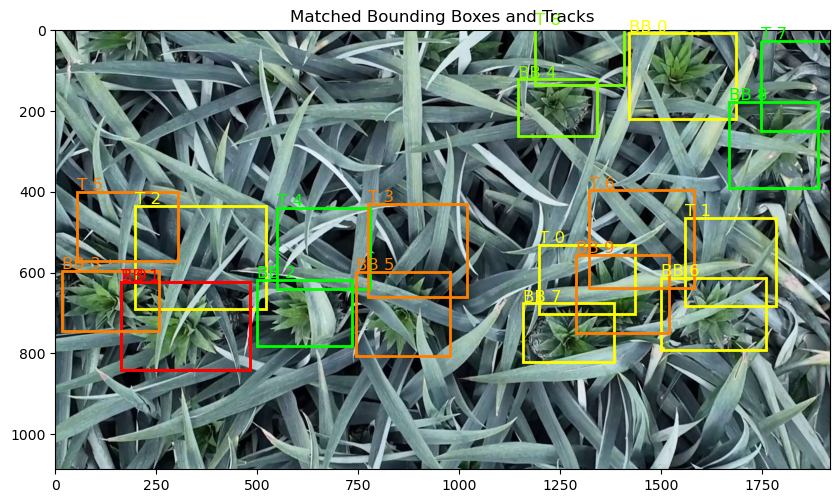

: 

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming the necessary functions (calculate_cost_matrix, find_matches) are already defined...

# Load your image
image_path = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00335.png"
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found.")
else:
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define colors for matches
    colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (0, 1, 1), 
              (1, 0, 1), (1, 0.5, 0), (0.5, 0, 1), (0, 0.5, 1), (0.5, 1, 0)]
    
    # Prepare cost matrix and find matches
    cost_matrix = calculate_cost_matrix(bounding_boxes, tracks, alpha=0.5)
    row_indices, col_indices = find_matches(-cost_matrix)
    
    # Create a set to track already colored matches
    match_colors = {}
    
    # Plot the image
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    
    # Draw bounding boxes and tracks
    for box_index, track_index in zip(row_indices, col_indices):
        # Determine color for this match (if not already assigned)
        if (box_index, track_index) not in match_colors:
            match_colors[(box_index, track_index)] = random.choice(colors)
        
        # Get color for current match
        color = match_colors[(box_index, track_index)]
        
        # Draw bounding box
        box = bounding_boxes[box_index]
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], 
                                            edgecolor=color, facecolor='none', linewidth=2))
        plt.text(box[0], box[1] - 5, f'BB {box_index}', color=color, fontsize=12)

        # Draw track
        track = tracks[track_index]
        plt.gca().add_patch(plt.Rectangle((track[0], track[1]), track[2] - track[0], track[3] - track[1], 
                                            edgecolor=color, facecolor='none', linewidth=2))
        plt.text(track[0], track[1] - 5, f'T {track_index}', color=color, fontsize=12)

    # Set plot title and show the plot
    plt.title("Matched Bounding Boxes and Tracks")
    plt.axis('on')
    plt.show()


IoU similariity

In [16]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def calculate_iou(box, track):
    x1 = max(box[0], track[0])
    y1 = max(box[1], track[1])
    x2 = min(box[2], track[2])
    y2 = min(box[3], track[3])
    
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    track_area = (track[2] - track[0]) * (track[3] - track[1])
    
    union_area = box_area + track_area - intersection_area
    iou = intersection_area / union_area if union_area > 0 else 0
    return iou

def calculate_aspect_ratio_similarity(box, track):
    box_width = box[2] - box[0]
    box_height = box[3] - box[1]
    track_width = track[2] - track[0]
    track_height = track[3] - track[1]

    box_aspect_ratio = box_width / box_height if box_height != 0 else 0
    track_aspect_ratio = track_width / track_height if track_height != 0 else 0

    similarity = 1 - abs(box_aspect_ratio - track_aspect_ratio) / max(box_aspect_ratio, track_aspect_ratio) if max(box_aspect_ratio, track_aspect_ratio) > 0 else 0
    return similarity

def calculate_combined_score(box, track, w1=0.7, w2=0.3):
    iou = calculate_iou(box, track)
    aspect_ratio_similarity = calculate_aspect_ratio_similarity(box, track)
    final_score = w1 * iou + w2 * aspect_ratio_similarity
    final_score = iou * aspect_ratio_similarity

    return final_score

bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],  # 0
    [163.61, 624.68, 481.58, 842.4],   # 1
    [499.51, 618.71, 734.06, 782.65],  # 2
    [15.217, 596.98, 255.37, 746.1],   # 3
    [1145.3, 121.67, 1342.1, 262.05],  # 4
    [745.83, 598.71, 976.46, 807.44],  # 5
    [1500.5, 613.43, 1760.8, 791.44],  # 6
    [1159.6, 676.4, 1384.3, 822.95],   # 7
    [1669.9, 177.3, 1888.9, 391.73],   # 8
    [1288.7, 557, 1519, 750.16],       # 9
    [61.481, 0, 327.97, 90.72]         # 10
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31], # 0 
    [1560.3, 464.85, 1785.1, 684.02], # 1
    [197.02, 434.92, 520.74, 690.84], # 2
    [774.69, 430.39, 1020.1, 660.59], # 3
    [549.6, 439.31, 778.23, 640.52],  # 4
    [53.311, 400.54, 303.12, 572.61], # 5
    [1322.6, 396.49, 1582.7, 639.04], # 6
    [1747, 27.165, 1954.3, 248.34],   # 7
    [1188.2, -7.5234, 1409, 134.49],  # 8
    [163.61, 624.68, 481.58, 842.4]   # 9
]

# Calculate combined score for each bounding box and track
num_boxes = len(bounding_boxes)
num_tracks = len(tracks)
combined_scores = np.zeros((num_boxes, num_tracks))

for i in range(num_boxes):
    for j in range(num_tracks):
        combined_scores[i, j] = calculate_combined_score(bounding_boxes[i], tracks[j])

# Perform linear assignment
row_ind, col_ind = linear_sum_assignment(-combined_scores)

# Print matches
print("Matches (bounding_box_index, track_index, score):")
for row, col in zip(row_ind, col_ind):
    score = combined_scores[row, col]
    print(f"Bounding Box {row} matches Track {col} with a score of {score:.4f}")




Matches (bounding_box_index, track_index, score):
Bounding Box 0 matches Track 5 with a score of 0.0000
Bounding Box 1 matches Track 9 with a score of 1.0000
Bounding Box 2 matches Track 4 with a score of 0.0397
Bounding Box 3 matches Track 2 with a score of 0.0380
Bounding Box 4 matches Track 8 with a score of 0.0312
Bounding Box 5 matches Track 3 with a score of 0.1307
Bounding Box 6 matches Track 1 with a score of 0.1219
Bounding Box 7 matches Track 6 with a score of 0.0000
Bounding Box 8 matches Track 7 with a score of 0.1118
Bounding Box 9 matches Track 0 with a score of 0.2877


In [18]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def calculate_giou(box, track):
    # Calculate intersection
    x1 = max(box[0], track[0])
    y1 = max(box[1], track[1])
    x2 = min(box[2], track[2])
    y2 = min(box[3], track[3])
    
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    track_area = (track[2] - track[0]) * (track[3] - track[1])
    
    # Calculate union
    union_area = box_area + track_area - intersection_area
    
    # Calculate minimum enclosing box
    enclosing_x1 = min(box[0], track[0])
    enclosing_y1 = min(box[1], track[1])
    enclosing_x2 = max(box[2], track[2])
    enclosing_y2 = max(box[3], track[3])
    enclosing_area = (enclosing_x2 - enclosing_x1) * (enclosing_y2 - enclosing_y1)
    
    # Calculate GIoU
    giou = (intersection_area / union_area) - ((enclosing_area - union_area) / enclosing_area) if enclosing_area > 0 else 0
    return giou

def calculate_aspect_ratio_similarity(box, track):
    box_width = box[2] - box[0]
    box_height = box[3] - box[1]
    track_width = track[2] - track[0]
    track_height = track[3] - track[1]

    box_aspect_ratio = box_width / box_height if box_height != 0 else 0
    track_aspect_ratio = track_width / track_height if track_height != 0 else 0

    similarity = 1 - abs(box_aspect_ratio - track_aspect_ratio) / max(box_aspect_ratio, track_aspect_ratio) if max(box_aspect_ratio, track_aspect_ratio) > 0 else 0
    return similarity

def calculate_combined_score(box, track, w1=0.7, w2=0.3):
    giou = calculate_giou(box, track)
    aspect_ratio_similarity = calculate_aspect_ratio_similarity(box, track)
    final_score = w1 * giou + w2 * aspect_ratio_similarity  # Changed to use GIoU
    final_score = giou *aspect_ratio_similarity  # Changed to use GIoU

    return final_score

bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],  # 0
    [163.61, 624.68, 481.58, 842.4],   # 1
    [499.51, 618.71, 734.06, 782.65],  # 2
    [15.217, 596.98, 255.37, 746.1],   # 3
    [1145.3, 121.67, 1342.1, 262.05],  # 4
    [745.83, 598.71, 976.46, 807.44],  # 5
    [1500.5, 613.43, 1760.8, 791.44],  # 6
    [1159.6, 676.4, 1384.3, 822.95],   # 7
    [1669.9, 177.3, 1888.9, 391.73],   # 8
    [1288.7, 557, 1519, 750.16],       # 9
    [61.481, 0, 327.97, 90.72]         # 10
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31], # 0 
    [1560.3, 464.85, 1785.1, 684.02], # 1
    [197.02, 434.92, 520.74, 690.84], # 2
    [774.69, 430.39, 1020.1, 660.59], # 3
    [549.6, 439.31, 778.23, 640.52],  # 4
    [53.311, 400.54, 303.12, 572.61], # 5
    [1322.6, 396.49, 1582.7, 639.04], # 6
    [1747, 27.165, 1954.3, 248.34],   # 7
    [1188.2, -7.5234, 1409, 134.49],  # 8
    [163.61, 624.68, 481.58, 842.4]   # 9
]

# Calculate combined score for each bounding box and track
num_boxes = len(bounding_boxes)
num_tracks = len(tracks)
combined_scores = np.zeros((num_boxes, num_tracks))

for i in range(num_boxes):
    for j in range(num_tracks):
        combined_scores[i, j] = calculate_combined_score(bounding_boxes[i], tracks[j])

# Perform linear assignment
row_ind, col_ind = linear_sum_assignment(-combined_scores)

# Print matches
print("Matches (bounding_box_index, track_index, score):")
for row, col in zip(row_ind, col_ind):
    score = combined_scores[row, col]
    print(f"Bounding Box {row} matches Track {col} with a score of {score:.4f}")


Matches (bounding_box_index, track_index, score):
Bounding Box 1 matches Track 9 with a score of 1.0000
Bounding Box 2 matches Track 4 with a score of -0.0870
Bounding Box 3 matches Track 2 with a score of -0.1823
Bounding Box 4 matches Track 8 with a score of -0.1473
Bounding Box 5 matches Track 3 with a score of 0.0256
Bounding Box 6 matches Track 1 with a score of 0.0351
Bounding Box 7 matches Track 0 with a score of -0.0687
Bounding Box 8 matches Track 7 with a score of -0.0736
Bounding Box 9 matches Track 6 with a score of 0.0502
Bounding Box 10 matches Track 5 with a score of -0.2832


In [20]:
def calculate_iou(box1, box2):
    # Extract coordinates
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2

    # Calculate intersection coordinates
    x1_inter = max(x1_1, x1_2)
    y1_inter = max(y1_1, y1_2)
    x2_inter = min(x2_1, x2_2)
    y2_inter = min(y2_1, y2_2)

    # Calculate intersection area
    inter_width = max(0, x2_inter - x1_inter)
    inter_height = max(0, y2_inter - y1_inter)
    inter_area = inter_width * inter_height

    # Calculate areas of the bounding boxes
    area1 = (x2_1 - x1_1) * (y2_1 - y1_1)
    area2 = (x2_2 - x1_2) * (y2_2 - y1_2)

    # Calculate union area
    union_area = area1 + area2 - inter_area

    # Calculate IoU
    iou = inter_area / union_area if union_area != 0 else 0

    return iou

# Bounding boxes and tracks
bounding_boxes = [
    [1421.1, 7.7202, 1685.3, 220.28],  # 0
    [163.61, 624.68, 481.58, 842.4],   # 1
    [499.51, 618.71, 734.06, 782.65],  # 2
    [15.217, 596.98, 255.37, 746.1],   # 3
    [1145.3, 121.67, 1342.1, 262.05],  # 4
    [745.83, 598.71, 976.46, 807.44],  # 5
    [1500.5, 613.43, 1760.8, 791.44],  # 6
    [1159.6, 676.4, 1384.3, 822.95],   # 7
    [1669.9, 177.3, 1888.9, 391.73],   # 8
    [1288.7, 557, 1519, 750.16],       # 9
    [61.481, 0, 327.97, 90.72]         # 10
]

tracks = [
    [1198.3, 531.13, 1435.2, 702.31], # 0 
    [1560.3, 464.85, 1785.1, 684.02], # 1
    [197.02, 434.92, 520.74, 690.84], # 2
    [774.69, 430.39, 1020.1, 660.59], # 3
    [549.6, 439.31, 778.23, 640.52],  # 4
    [53.311, 400.54, 303.12, 572.61], # 5
    [1322.6, 396.49, 1582.7, 639.04], # 6
    [1747, 27.165, 1954.3, 248.34],   # 7
    [1188.2, -7.5234, 1409, 134.49],  # 8
    [163.61, 624.68, 481.58, 842.4]   # 9
]

# Calculate IoU for each pair
iou_matrix = []
for i, bb in enumerate(bounding_boxes):
    iou_row = []
    for j, tr in enumerate(tracks):
        iou = calculate_iou(bb, tr)
        iou_row.append(iou)
    iou_matrix.append(iou_row)

# Print IoU matrix
for i, row in enumerate(iou_matrix):
    print(f"Bounding Box {i}: {row}")

Bounding Box 0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Bounding Box 1: [0.0, 0.0, 0.14128871402585041, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Bounding Box 2: [0.0, 0.0, 0.012785800476414973, 0.0, 0.0500184972474911, 0.0, 0.0, 0.0, 0.0, 0.0]
Bounding Box 3: [0.0, 0.0, 0.04838900660171173, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11865465276600456]
Bounding Box 4: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0346077191725495, 0.0]
Bounding Box 5: [0.0, 0.0, 0.0, 0.13549538393570992, 0.014599439431204973, 0.0, 0.0, 0.0, 0.0, 0.0]
Bounding Box 6: [0.0, 0.17376213541098093, 0.0, 0.0, 0.0, 0.0, 0.01961590529598937, 0.0, 0.0, 0.0]
Bounding Box 7: [0.07018707742839381, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Bounding Box 8: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12185031975087536, 0.0, 0.0]
Bounding Box 9: [0.33393135226815945, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17617287383431682, 0.0, 0.0, 0.0]
Bounding Box 10: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [21]:
np.round(np.array(iou_matrix), decimals=2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.14, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.17, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  ],
       [0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
iou_matrix

In [22]:
import numpy as np

# Define the array
arr = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.14129, 0, 0, 0, 0, 0, 0, 0, 0.057583],
    [0, 0, 0, 0, 0, 0, 0, 0.012789, 0, 0.050012, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.048389, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03462, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.13548, 0.014598, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.1738, 0, 0, 0, 0, 0.019608, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.070198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12182, 0, 0],
    [0, 0, 0, 0, 0, 0.3338, 0, 0, 0, 0, 0, 0.17614, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Step 1: Check which elements are greater than 0.10
condition = arr > 0.10

# Step 2: Check if any element in each row satisfies the condition
rows_with_condition = np.any(condition, axis=1)

# Step 3: Get the row indexes where the condition is True
row_indexes = np.where(rows_with_condition)[0]

print(row_indexes)

[1 5 6 8 9]


In [24]:
arr[row_indexes].shape

(5, 16)

In [29]:
import numpy as np
import math

# Convert Tracks to a NumPy array
tracks = np.array([
    [1184.1, 977.85, 1278.8, 1090.5, 0],
    [1579, 964.74, 1814.8, 1201.8, 0],
    [1417.6, 1037.4, 1528.7, 1111.2, 0],
    [890.23, 905.22, 1118.1, 1116.7, 0],
    [383.47, 941.87, 421.88, 1426.5, 0],
    [1198.3, 531.13, 1435.2, 702.31, 0],
    [1560.3, 464.85, 1785.1, 684.02, 0],
    [197.02, 434.92, 520.74, 690.84, 0],
    [774.69, 430.39, 1020.1, 660.59, 0],
    [549.6, 439.31, 778.23, 640.52, 0],
    [53.311, 400.54, 303.12, 572.61, 0],
    [1322.6, 396.49, 1582.7, 639.04, 0],
    [35.476, 340.42, 92.972, 520.33, 0],
    [1747, 27.165, 1954.3, 248.34, 0],
    [1188.2, -7.5234, 1409, 134.49, 0],
    [364.5, 796.21, 459.36, 914.82, 0]
])

# Convert More than 0.10 dets[row_indexes] to a NumPy array
dets = np.array([
    [1288.7, 557, 1519, 750.16, 0.69267]
])

def compute_iou(box1, box2):
    # Extract coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Compute intersection area
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Compute areas of the individual bounding boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute union area
    union_area = box1_area + box2_area - intersection_area

    # Compute IoU
    iou = intersection_area / union_area if union_area > 0 else 0

    return iou

def compute_ciou(box1, box2):
    # Compute IoU
    iou = compute_iou(box1, box2)

    # Get box coordinates
    b1_x1, b1_y1, b1_x2, b1_y2 = box1
    b2_x1, b2_y1, b2_x2, b2_y2 = box2

    # Compute center points
    b1_cx = (b1_x1 + b1_x2) / 2
    b1_cy = (b1_y1 + b1_y2) / 2
    b2_cx = (b2_x1 + b2_x2) / 2
    b2_cy = (b2_y1 + b2_y2) / 2

    # Compute squared Euclidean distance between centers
    rho2 = (b1_cx - b2_cx) ** 2 + (b1_cy - b2_cy) ** 2

    # Compute diagonal length of the smallest enclosing box
    c2 = (max(b1_x2, b2_x2) - min(b1_x1, b2_x1)) ** 2 + (max(b1_y2, b2_y2) - min(b1_y1, b2_y1)) ** 2

    # Compute aspect ratio consistency
    w1, h1 = b1_x2 - b1_x1, b1_y2 - b1_y1
    w2, h2 = b2_x2 - b2_x1, b2_y2 - b2_y1
    arctan = math.atan(w2 / h2) - math.atan(w1 / h1)
    v = (4 / (math.pi ** 2)) * (arctan ** 2)

    # Compute alpha
    alpha = v / ((1 - iou) + v)

    # Compute CIoU
    ciou = iou - (rho2 / c2) - alpha * v

    return ciou

# Compute IoU and CIoU for each track with the detection
for i, track in enumerate(tracks):
    iou = compute_iou(track[:4], dets[0][:4])
    ciou = compute_ciou(track[:4], dets[0][:4])
    print(f"Track {i}: IoU = {iou:.4f}, CIoU = {ciou:.4f}")

Track 0: IoU = 0.0000, CIoU = -0.0001
Track 1: IoU = 0.0000, CIoU = -0.0000
Track 2: IoU = 0.0000, CIoU = -0.0000
Track 3: IoU = 0.0000, CIoU = -0.0000
Track 4: IoU = 0.0000, CIoU = -0.0519
Track 5: IoU = 0.3339, CIoU = 0.3339
Track 6: IoU = 0.0000, CIoU = -0.0000
Track 7: IoU = 0.0000, CIoU = -0.0000
Track 8: IoU = 0.0000, CIoU = -0.0000
Track 9: IoU = 0.0000, CIoU = -0.0000
Track 10: IoU = 0.0000, CIoU = -0.0000
Track 11: IoU = 0.1762, CIoU = 0.1762
Track 12: IoU = 0.0000, CIoU = -0.0147
Track 13: IoU = 0.0000, CIoU = -0.0000
Track 14: IoU = 0.0000, CIoU = -0.0000
Track 15: IoU = 0.0000, CIoU = -0.0002


In [32]:
import numpy as np

def calculate_iou(box1, box2):
    # Calculate the coordinates of the intersection rectangle
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Calculate the area of intersection
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Calculate the area of both bounding boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate the area of union
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area if union_area > 0 else 0

    return iou

def calculate_aspect_ratio_similarity(box1, box2):
    # Calculate aspect ratios
    aspect_ratio1 = (box1[2] - box1[0]) / (box1[3] - box1[1])
    aspect_ratio2 = (box2[2] - box2[0]) / (box2[3] - box2[1])

    # Calculate aspect ratio similarity
    aspect_ratio_similarity = min(aspect_ratio1, aspect_ratio2) / max(aspect_ratio1, aspect_ratio2)

    return aspect_ratio_similarity

def calculate_iou_with_aspect_ratio_similarity(box1, box2):
    iou = calculate_iou(box1, box2)
    aspect_ratio_similarity = calculate_aspect_ratio_similarity(box1, box2)

    # Combine IoU and aspect ratio similarity (you can adjust the weight if needed)
    combined_similarity = iou * aspect_ratio_similarity

    return combined_similarity

# Convert Tracks to a NumPy array
tracks = np.array([
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [1322.6, 396.49, 1582.7, 639.04],
])

# Convert More than 0.10 dets[row_indexes] to a NumPy array
dets = np.array([
    [1500.5, 613.43, 1760.8, 791.44, ],
    [1159.6, 676.4, 1384.3, 822.95, ],
    [1669.9, 177.3, 1888.9, 391.73, ],
    [1288.7, 557, 1519, 750.16, ],
])

for i, track in enumerate(tracks):
    iou = calculate_iou_with_aspect_ratio_similarity(track[:4], dets[0][:4])
    print(f"Track {i}: IoU with Aspect Ratio Similarity = {iou:.4f}")

Track 0: IoU with Aspect Ratio Similarity = 0.0000
Track 1: IoU with Aspect Ratio Similarity = 0.1219
Track 2: IoU with Aspect Ratio Similarity = 0.0144


In [36]:
tracks = np.array([
    [1198.3, 531.13, 1435.2, 702.31],
    [1560.3, 464.85, 1785.1, 684.02],
    [1322.6, 396.49, 1582.7, 639.04],
])

# Convert More than 0.10 dets[row_indexes] to a NumPy array
dets = np.array([
    #[1500.5, 613.43, 1760.8, 791.44, ],
    #[1159.6, 676.4, 1384.3, 822.95, ],
    #[1669.9, 177.3, 1888.9, 391.73, ],
    [1288.7, 557, 1519, 750.16, ],
])

for i, track in enumerate(tracks):
    iou = calculate_iou_with_aspect_ratio_similarity(track[:4], dets[0][:4])
    print(f"Track {i}: IoU with Aspect Ratio Similarity = {iou:.4f}")

Track 0: IoU with Aspect Ratio Similarity = 0.2877
Track 1: IoU with Aspect Ratio Similarity = 0.0000
Track 2: IoU with Aspect Ratio Similarity = 0.1585


In [48]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint

# Example detections and tracks
detections = np.array([
    [1421.1, 7.7202, 1685.3, 220.28, 0.8169],
    [163.61, 624.68, 481.58, 842.4, 0.81364],
    [499.51, 618.71, 734.06, 782.65, 0.80594],
    [15.217, 596.98, 255.37, 746.1, 0.78787],
    [1145.3, 121.67, 1342.1, 262.05, 0.77928],
    [745.83, 598.71, 976.46, 807.44, 0.77625],
    [1500.5, 613.43, 1760.8, 791.44, 0.77464],
    [1159.6, 676.4, 1384.3, 822.95, 0.7472],
    [1669.9, 177.3, 1888.9, 391.73, 0.74538],
    [1288.7, 557, 1519, 750.16, 0.69267],
    [61.481, 0, 327.97, 90.72, 0.67228]
])

# Tracks
tracks = np.array([
    [1174.6, 965.56, 1263.6, 1099.9, 0],
    [1581.7, 996.99, 1811.7, 1221.1, 0],
    [1421.1, 1063.7, 1522.8, 1117.6, 0],
    [892.25, 895.87, 1119, 1104.2, 0],
    [369.47, 776.34, 452.08, 1013.5, 0],
    [1196.1, 537.93, 1432.9, 713.52, 0],
    [1559.1, 470.24, 1784.9, 697.03, 0],
    [195.53, 437.87, 520.25, 704.14, 0],
    [773.32, 436.37, 1020.4, 675.4, 0],
    [549.21, 442.45, 777.73, 647.1, 0],
    [47.793, 407.75, 299.87, 581.25, 0],
    [1320.5, 392.62, 1585.3, 655.64, 0],
    [32.801, 350, 91.73, 533.87, 0],
    [1749.7, 23.409, 1948.5, 266.07, 0],
    [1178.3, -12.17, 1421.1, 157.05, 0]
])

# Compute pairwise similarities (e.g., IoU)
def compute_giou(box1, box2):
    # Extract coordinates
    x1, y1, x2, y2 = box1
    x1_, y1_, x2_, y2_ = box2

    # Intersection coordinates
    xi1 = max(x1, x1_)
    yi1 = max(y1, y1_)
    xi2 = min(x2, x2_)
    yi2 = min(y2, y2_)

    # Intersection area
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

    # Areas of the individual boxes
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2_ - x1_) * (y2_ - y1_)

    # Union area
    union_area = box1_area + box2_area - inter_area

    # IoU
    iou = inter_area / union_area if union_area > 0 else 0

    # Smallest enclosing box coordinates
    xe1 = min(x1, x1_)
    ye1 = min(y1, y1_)
    xe2 = max(x2, x2_)
    ye2 = max(y2, y2_)

    # Area of the smallest enclosing box
    enclosing_area = (xe2 - xe1) * (ye2 - ye1)

    # GIoU
    giou = iou - ((enclosing_area - union_area) / enclosing_area) if enclosing_area > 0 else iou

    return giou

# Create pairwise similarity matrix
n = len(detections)
m = len(tracks)
w_ij = np.array([[compute_giou(detections[i][:4], tracks[j][:4]) for j in range(m)] for i in range(n)])

# Create higher-order similarity matrix (example: spatial consistency)
w_ijk = np.zeros((n, n, m))
for i in range(n):
    for j in range(n):
        for k in range(m):
            # Example: Higher-order similarity based on spatial proximity
            w_ijk[i, j, k] = 1.0 if abs(i - j) <= 1 else 0.0

# Flatten the decision variables for optimization
x0 = np.zeros(n * m)  # Initial guess

# Objective function
def objective(x):
    x = x.reshape((n, m))
    pairwise_cost = np.sum(w_ij * x)
    higher_order_cost = np.sum(w_ijk * x[:, np.newaxis, :] * x[np.newaxis, :, :])
    return -(pairwise_cost + higher_order_cost)  # Negative for minimization

# Constraints: Each detection assigned to at most one track
A = np.zeros((n, n * m))
for i in range(n):
    A[i, i * m:(i + 1) * m] = 1
constraint_detections = LinearConstraint(A, lb=0, ub=1)

# Constraints: Each track assigned to at most one detection
A = np.zeros((m, n * m))
for j in range(m):
    A[j, j::m] = 1
constraint_tracks = LinearConstraint(A, lb=0, ub=1)

# Bounds: Binary variables
bounds = [(0, 1) for _ in range(n * m)]

# Solve the problem
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=[constraint_detections, constraint_tracks])

# Reshape the solution
x_opt = result.x.reshape((n, m))

# Print the results
for i in range(n):
    for j in range(m):
        if x_opt[i, j] > 0.5:  # Threshold to convert to binary
            print(f"Detection {np.round(detections[i], decimals=2)}  assigned to Track {tracks[j]} {i}-{j}")

Detection [1.6361e+02 6.2468e+02 4.8158e+02 8.4240e+02 8.1000e-01]  assigned to Track [195.53 437.87 520.25 704.14   0.  ] 1-7
Detection [7.4583e+02 5.9871e+02 9.7646e+02 8.0744e+02 7.8000e-01]  assigned to Track [ 773.32  436.37 1020.4   675.4     0.  ] 5-8
Detection [1.5005e+03 6.1343e+02 1.7608e+03 7.9144e+02 7.7000e-01]  assigned to Track [1559.1   470.24 1784.9   697.03    0.  ] 6-6
Detection [1.2887e+03 5.5700e+02 1.5190e+03 7.5016e+02 6.9000e-01]  assigned to Track [1196.1   537.93 1432.9   713.52    0.  ] 9-5


In [51]:
import numpy as np

# Detections and Tracks
detections = np.array([
    [1196.1, 537.93, 1432.9, 713.52]     # 10
])

tracks = np.array([
    [1288.7, 557, 1519, 750.16]
])

# Function to compute aspect ratios
def compute_aspect_ratios(bboxes):
    widths = bboxes[:, 2] - bboxes[:, 0]  # x2 - x1
    heights = bboxes[:, 3] - bboxes[:, 1] # y2 - y1
    aspect_ratios = widths / heights
    return aspect_ratios

# Compute aspect ratios for detections and tracks
detection_aspect_ratios = compute_aspect_ratios(detections)
track_aspect_ratios = compute_aspect_ratios(tracks)

# Function to compute aspect similarity (using absolute difference)
def compute_aspect_similarity(detection_ratios, track_ratios):
    similarity_matrix = np.abs(detection_ratios[:, None] - track_ratios[None, :])
    return similarity_matrix

# Compute aspect similarity
aspect_similarity = compute_aspect_similarity(detection_aspect_ratios, track_aspect_ratios)

print("Aspect Similarity Matrix:")
print(np.round(aspect_similarity, decimals=2))

Aspect Similarity Matrix:
[[0.16]]


In [68]:
import numpy as np


def cosine_similarity(vec1, vec2):
    """
    Compute the cosine similarity between two vectors.

    Parameters:
    vec1 (list or np.array): The first vector.
    vec2 (list or np.array): The second vector.

    Returns:
    float: The cosine similarity between the two vectors.
    """
    # Convert inputs to numpy arrays
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    
    # Compute the dot product
    dot_product = np.dot(vec1, vec2)
    
    # Compute the magnitudes (Euclidean norms) of the vectors
    magnitude_vec1 = np.linalg.norm(vec1)
    magnitude_vec2 = np.linalg.norm(vec2)
    
    # Compute the cosine similarity
    cosine_sim = dot_product / (magnitude_vec1 * magnitude_vec2)
    
    return cosine_sim

def compute_aspect_ratio(bbox):
    """Compute the aspect ratio of a bounding box."""
    width = bbox[2] - bbox[0]  # x2 - x1
    height = bbox[3] - bbox[1] # y2 - y1
    aspect_ratio = width / height
    return aspect_ratio

def aspect_similarity(bbox1, bbox2, max_difference=None):
    """Compute the normalized aspect similarity between two bounding boxes."""
    aspect_ratio1 = compute_aspect_ratio(bbox1)
    aspect_ratio2 = compute_aspect_ratio(bbox2)
    
    # Absolute difference between aspect ratios
    difference = abs(aspect_ratio1 - aspect_ratio2)
    
    # If max_difference is not provided, use the sum of the two aspect ratios
    if max_difference is None:
        max_difference = aspect_ratio1 + aspect_ratio2
    
    # Normalize the difference to [0, 1]
    similarity = 1 - (difference / max_difference)
    
    # Clip to ensure the result is within [0, 1]
    similarity = np.clip(similarity, 0, 1)
    
    return similarity

# Example bounding boxes
bbox1 = [1421.1, 7.7202, 1685.3, 220.28]  # Detection
bbox2 = [1174.6, 965.56, 1263.6, 1099.9]  # Track

# Compute aspect similarity
similarity = aspect_similarity(bbox1, bbox2)
print(f"Aspect Similarity: {similarity:.4f}")

Aspect Similarity: 0.6954


In [71]:
def bbox_area(bbox):
    """
    Calculate the area of a bounding box.

    Parameters:
    bbox (list or tuple): A list or tuple representing the bounding box as [x1, y1, x2, y2].

    Returns:
    float: The area of the bounding box.
    """
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    area = width * height
    return area

def bbox_area_difference(bbox1, bbox2):
    """
    Compute the difference in area between two bounding boxes.

    Parameters:
    bbox1 (list or tuple): The first bounding box as [x1, y1, x2, y2].
    bbox2 (list or tuple): The second bounding box as [x1, y1, x2, y2].

    Returns:
    float: The absolute difference in area between the two bounding boxes.
    """
    area1 = bbox_area(bbox1)
    area2 = bbox_area(bbox2)
    difference = abs(area1 - area2)
    return difference

# Example usage
bbox1 = [100, 150, 300, 400]  # [x1, y1, x2, y2]
bbox2 = [120, 180, 320, 420]  # [x1, y1, x2, y2]

area1 = bbox_area(bbox1)
area2 = bbox_area(bbox2)
difference = bbox_area_difference(bbox1, bbox2)

print("Area of Bounding Box 1:", area1)
print("Area of Bounding Box 2:", area2)
print("Difference in Area:", difference)

Area of Bounding Box 1: 50000
Area of Bounding Box 2: 48000
Difference in Area: 2000


In [72]:
detections = [1196.1, 537.93, 1432.9, 713.52]     # 10
tracks = [1288.7, 557, 1519, 750.16]

value = aspect_similarity(detections, tracks)
cosine_similarity(detections, tracks)
bbox_area_difference(detections, tracks)

2905.035999999949

In [73]:
detections = [1322.6, 396.49, 1582.7, 639.04]
tracks = [1288.7, 557, 1519, 750.16]

value = aspect_similarity(detections, tracks)
cosine_similarity(detections, tracks)
bbox_area_difference(detections, tracks)

18602.507000000034